<a href="https://colab.research.google.com/github/vidhishashetty/CodersWeek-ML/blob/master/mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
pip install tensorflow keras numpy matplotlib mnist

In [0]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout 
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
#Load training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [210]:



# Reshape
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train=(X_train/255)
X_test=(X_test/255)

# print the final input shape ready for training
print("Training vector shape", X_train.shape)
print("Testing vector shape", X_test.shape)

Training vector shape (60000, 784)
Testing vector shape (10000, 784)


In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [222]:
n_classes = 10
print("Training Label Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Testing Label Shape after one-hot encoding: ", Y_train.shape)


Training Label Shape before one-hot encoding:  (60000,)
Testing Label Shape after one-hot encoding:  (60000, 10)


In [223]:
model.fit(X_train,Y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.33,
)


Train on 40199 samples, validate on 19801 samples
Epoch 1/20
40199/40199 [==============================] - 6s 141us/step - loss: 0.3004 - accuracy: 0.9117 - val_loss: 0.1539 - val_accuracy: 0.9529
Epoch 2/20
40199/40199 [==============================] - 6s 138us/step - loss: 0.1201 - accuracy: 0.9629 - val_loss: 0.1106 - val_accuracy: 0.9645
Epoch 3/20
40199/40199 [==============================] - 6s 138us/step - loss: 0.0795 - accuracy: 0.9748 - val_loss: 0.0992 - val_accuracy: 0.9702
Epoch 4/20
40199/40199 [==============================] - 6s 139us/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.1029 - val_accuracy: 0.9702
Epoch 5/20
40199/40199 [==============================] - 6s 140us/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0909 - val_accuracy: 0.9742
Epoch 6/20
40199/40199 [==============================] - 6s 140us/step - loss: 0.0393 - accuracy: 0.9867 - val_loss: 0.0964 - val_accuracy: 0.9738
Epoch 7/20
40199/40199 [==============================] - 6s 1

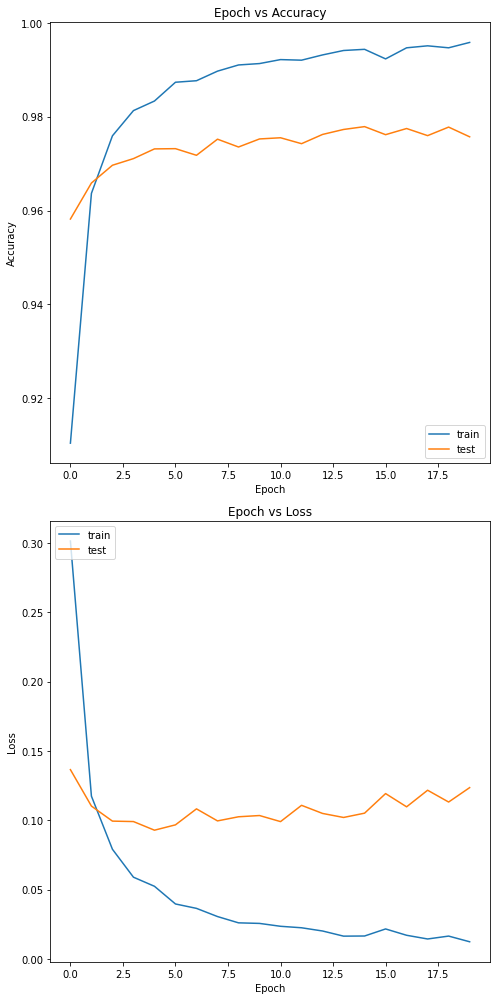

In [226]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Epoch vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Epoch vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()

In [227]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 98.22%
loss: 9.92%


In [0]:
predicted_classes = model.predict_classes(X_test)

In [0]:
import numpy as np

In [230]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices),"Images were classified correctly")
print(len(incorrect_indices)," Images were not classified incorrectly")




9822 Images were classified correctly
178  Images were not classified incorrectly


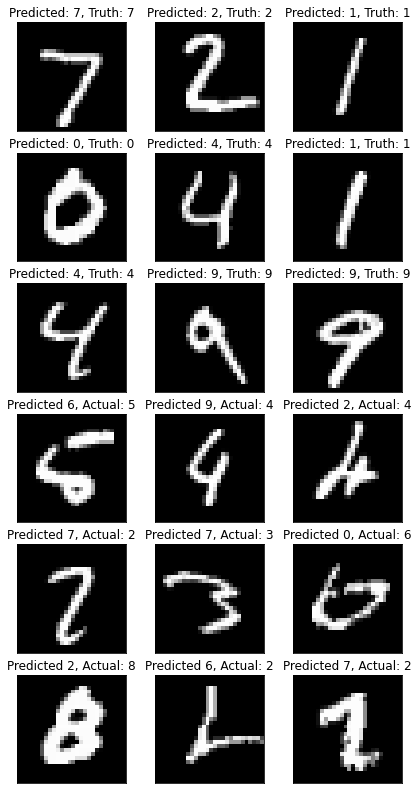

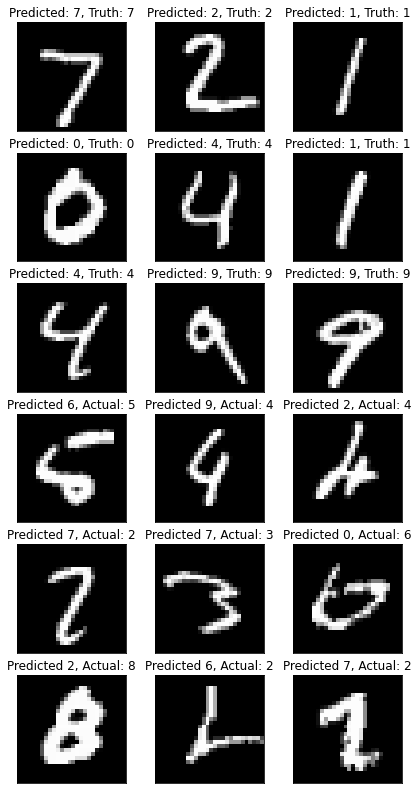

In [231]:
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Actual: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation



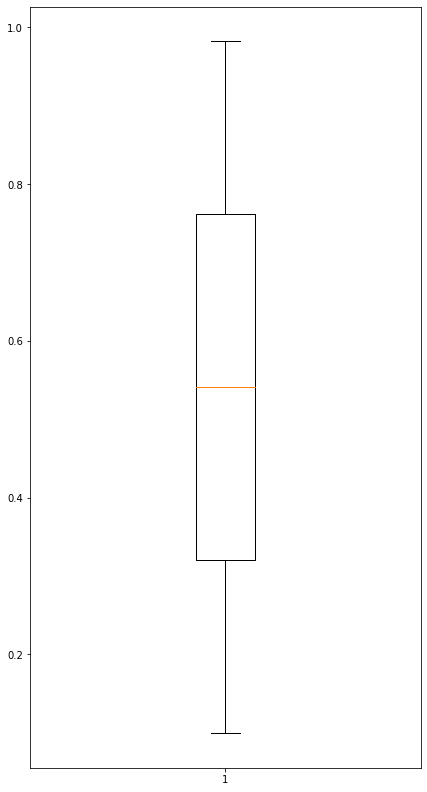

In [233]:
plt.boxplot(scores)
plt.show()

In [0]:
#Saved the model
model.save('final_model.h5')

In [239]:
# load model
# model = load_model('final_model.h5')
# evaluate model on test dataset
# acc = model.evaluate(X_test,Y_test, verbose=0)
# print(acc)

[0.09916631503521015, 0.982200026512146]


In [249]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['sample_image.png']))

Saving sample_image.png to sample_image (1).png


In [0]:
#Image of 7 was loaded
#Lets see if model can predict or not

This image was loaded
![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image-300x298.png)

In [271]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model 

img = load_img("sample_image.png",color_mode="grayscale", target_size=(28, 28))
img = img_to_array(img)
img = img.reshape(-1,784)
img = img.astype('float32')
img = img / 255.0
model = load_model('final_model.h5')

#predict the class
digit = model.predict_classes(img)
print("Loaded Image is of 7, Model predicts it as :",end=" ")
print(digit[0])

Loaded Image is of 7, Model predicts it as : 7
